<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [3]:
fashion = tf.keras.datasets.fashion_mnist;

(x_train, y_train), (x_test, y_test) = fashion.load_data();
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.98833, random_state=42)

print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set: (700, 28, 28), (700,)
Validation set: (59300, 28, 28), (59300,)
Test set: (10000, 28, 28), (10000,)


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28)),  # Define input shape here
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_valid, y_valid))


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 487ms/step - accuracy: 0.2098 - loss: 2.2144 - val_accuracy: 0.4016 - val_loss: 1.8127
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.3806 - loss: 1.8068 - val_accuracy: 0.5813 - val_loss: 1.4078
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4488 - loss: 1.4542 - val_accuracy: 0.6476 - val_loss: 1.0919
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.5226 - loss: 1.3257 - val_accuracy: 0.6719 - val_loss: 0.9891
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.5673 - loss: 1.2016 - val_accuracy: 0.6594 - val_loss: 0.9091
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.6095 - loss: 1.0514 - val_accuracy: 0.6739 - val_loss: 0.9025
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.6298 - loss: 1.0230 - val_accuracy: 0.7003 - val_loss: 0.7955
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6746 - loss: 0.8962 - val_accuracy: 

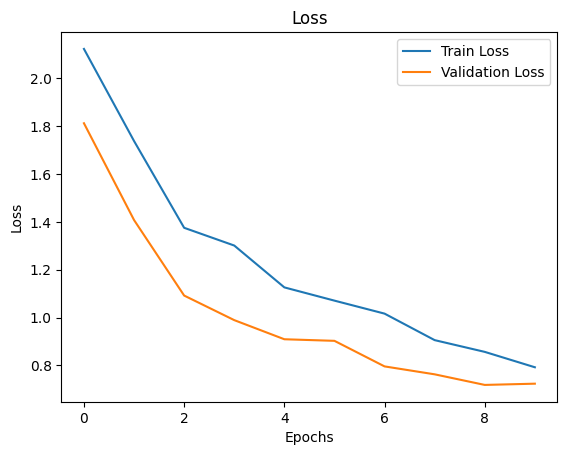

In [6]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.7310 - loss: 0.7393


[0.7393333911895752, 0.7310000061988831]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


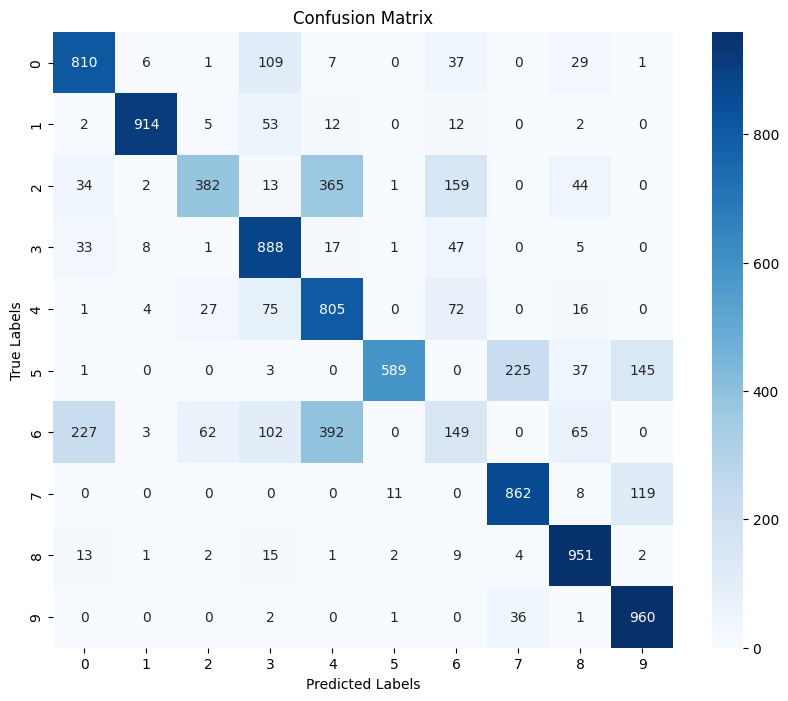

In [8]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
